In [2]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline


In [3]:
sys.path.insert(0,'/mnt/meom/workdir/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/'
march_buoyfiles = sorted(glob.glob(database + 'filt-3D/NATL60-CJM165_y2013m03d*.1d_buoyancy_filt-n80-f0.0125.nc'))
march_wfiles = sorted(glob.glob(database + 'filt-3D/NATL60-CJM165_y2013m03d*.1d_vovecrtz_filt-n80-f0.0125.nc'))
march_mldfiles = sorted(glob.glob(database + 'MXL/NATL60-CJM165_y2013m03d*.1d_somxl010.nc'))
maskfile= '/mnt/meom/workdir/albert/NATL60/NATL60-I/NATL60-CJM165.1d_mask1-139_filt-n80-f0.0125.nc'

In [4]:
dep=xr.open_dataset(march_buoyfiles[0])['deptht']

In [5]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,0:139,jmin:jmax+1,imin:imax+1]
    return values


In [6]:
def Estimate_wb(box,buoy,w,tmask):
    buoy_box = get_values_in_box(box,buoy)
    w_box = get_values_in_box(box,w)  
    
    tmask_box = get_values_in_box(box,tmask)
    
    buoy_box_mask=ma.masked_where(tmask_box < 1, buoy_box)
    
    w_arr=w_box.values
    
    wb_box = np.squeeze(buoy_box_mask[0,:,:,:]*w_arr[0,:,:,:])
    avg_wb_box = np.nanmean(np.nanmean(wb_box,axis=2),axis=1)
    return avg_wb_box

In [7]:
def get_wb_in_boxes(buoyfiles,wfiles):
    global boxes
    _Ann_wb_arr = []
    for i in range(len(buoyfiles)): 
        print buoyfiles[i]
        buoy = xr.open_dataset(buoyfiles[i])['sobuoy']
        w = xr.open_dataset(wfiles[i])['vovecrtz']
        tmask = xr.open_dataset(maskfile)['tmask']
        _wb_arr=[]
        for box in boxes:
            print box.name
            wb = Estimate_wb(box,buoy,w,tmask)
            _wb_arr.append(wb)
        wb_arr = np.array(_wb_arr)
        _Ann_wb_arr.append(wb_arr)
    Ann_wb_arr = np.array(_Ann_wb_arr)
    return Ann_wb_arr

In [8]:
buoy = xr.open_dataset(march_buoyfiles[0])['sobuoy']
w = xr.open_dataset(march_wfiles[0])['vovecrtz']
tmask = xr.open_dataset(maskfile)['tmask']
box=boxes[0]

In [9]:
def get_indices_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    return imin,imax,jmin,jmax

imin,imax,jmin,jmax=get_indices_box(box,buoy)
print ' indices = ',imin,imax,jmin,jmax

 indices =  3374 3926 1780 2698


In [10]:
buoy_box = get_values_in_box(box,buoy)
w_box = get_values_in_box(box,w)  
    
tmask_box = get_values_in_box(box,tmask)
    


In [11]:
buoy_box_mask=ma.masked_where(tmask_box < 1, buoy_box)
    
w_arr=w_box.values
    
wb_box = np.squeeze(buoy_box_mask[0,:,:,:]*w_arr[0,:,:,:])


In [18]:
wb_box.shape

(139, 919, 553)

In [12]:
box14file='/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box14-CJM165_y2013m03d01.1d_wbuoy_filt-n80-f0.0125.nc'

In [13]:
dsbox14=xr.open_dataset(box14file)['wbuoy']

In [14]:
dsbox14.shape

(1, 139, 919, 553)

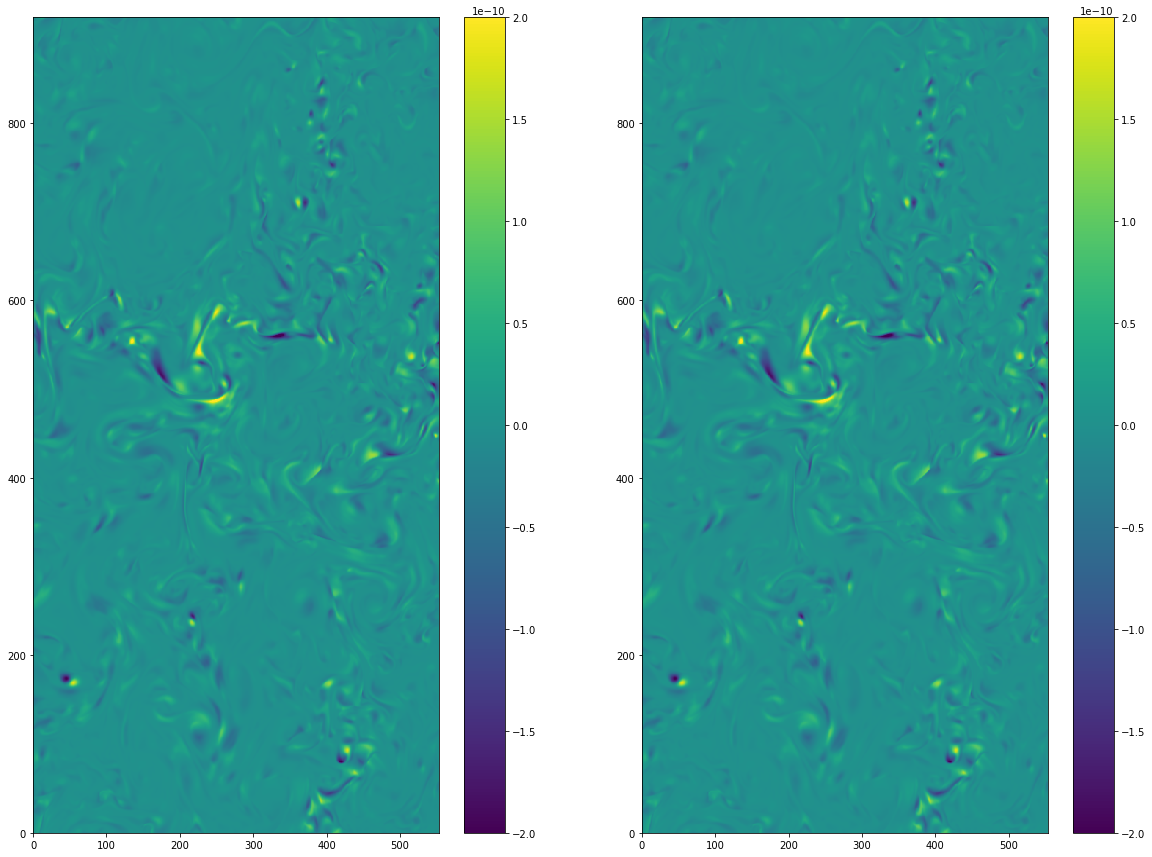

In [16]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(121)
pcolor=ax.pcolormesh(wb_box[0],vmin=-2e-10,vmax=2e-10)
plt.colorbar(pcolor)

ax = fig.add_subplot(122)
pcolor=ax.pcolormesh(np.squeeze(dsbox14[0,0]),vmin=-2e-10,vmax=2e-10)
plt.colorbar(pcolor)


(1600, 0)

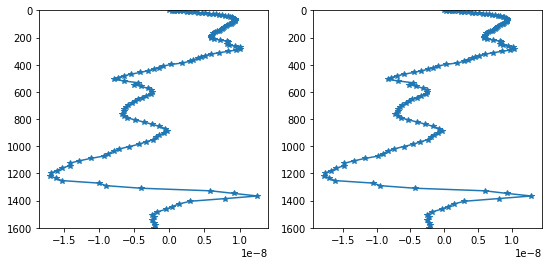

In [23]:
fig, axs = plt.subplots(1,2, figsize=(9, 4))
axs = axs.ravel()
axs[0].plot(np.nanmean(np.nanmean(wb_box,axis=2),axis=1),dep,'C0*-')
axs[0].set_ylim(1600,0)
 
axs[1].plot(np.nanmean(np.nanmean(np.squeeze(dsbox14[0]),axis=2),axis=1),dep,'C0*-')
axs[1].set_ylim(1600,0)


In [21]:
print box.name

Box_14


In [6]:
def get_indices_box(box):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    return imin,imax,jmin,jmax

for box in boxes :
    print box.name
    imin,imax,jmin,jmax=get_indices_box(box)
    print ' indices = ',imin,imax,jmin,jmax

Box_14
 indices =  3374 3926 1780 2698
Box_13
 indices =  2813 3375 1773 2696
Box_12
 indices =  2309 2835 1777 2742
Box_11
 indices =  1761 2239 1833 2785
Box_10
 indices =  3681 4247 962 1778
Box_7
 indices =  1931 2494 968 1802
Box_6
 indices =  3684 4286 232 963
Box_5
 indices =  3088 3686 232 957
Box_4
 indices =  2491 3087 232 959
Box_3
 indices =  1891 2488 232 961
Box_2
 indices =  1288 1889 234 974
Box_1
 indices =  695 1295 236 993
Box_9
 indices =  3088 3676 957 1770
Box_8
 indices =  2493 3088 958 1783
